In [276]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, n_iter = 10, lr = 0.01):
        self.lr = 0.1
        self.n_iter = n_iter
        self.errors = []
    
    def fit(self, X, y):
        X_bias = np.hstack((np.ones((X.shape[0], 1)), X))
        self.w = np.random.randn(X_bias.shape[1])
        for i in range(self.n_iter):
            z = np.where(X_bias.dot(self.w) > 0, 1, -1)
            self.w += self.lr*(y - z).dot(X_bias) 
            self.errors.append(np.sum(y!=z))
            
    def predict(self, X):
        if not isinstance(X, np.ndarray):
            X = np.array(X)
        X_bias = np.hstack((np.ones((X.shape[0], 1)), X))
        return np.where(X_bias.dot(self.w) > 0, 1, -1)
    
    def decision(self, X):
        if not isinstance(X, np.ndarray):
            X = np.array(X)
        X_bias = np.hstack((np.ones((X.shape[0], 1)), X))
        return X_bias.dot(self.w)
        

In [266]:
from sklearn.datasets import make_blobs
X, y = make_blobs(cluster_std=1.3)
y[y==2] = 1

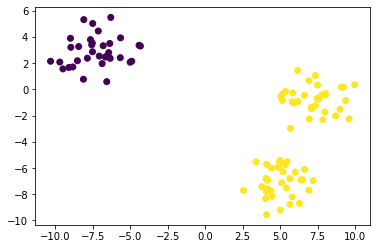

In [267]:
plt.scatter(X[:,0], X[:,1], c=y)

In [301]:
MCP = Perceptron(1000, 0.07)

In [302]:
MCP.fit(X, y)

In [303]:
# MCP.predict(np.array([[-6, -10]]))

In [309]:
def mesh_grid_vizual(X, y):
    x0 = np.linspace(np.min(X[:,0])-2, np.max(X[:,0])+2, 100)
    x1 = np.linspace(np.min(X[:,1])-2, np.max(X[:,1])+2, 100)
    a,b = np.meshgrid(x0, x1)
    X_new = np.c_[a.ravel(), b.ravel()]
    predictions = MCP.predict(X_new)
    decision = MCP.decision(X_new)
    plt.contourf(x0, x1, predictions.reshape(a.shape), cmap=plt.cm.brg, alpha = 0.4)
    plt.contourf(x0, x1, decision.reshape(a.shape), cmap=plt.cm.brg, alpha = 0.2)
    plt.scatter(X[:,0], X[:, 1], c = y)
    plt.show()

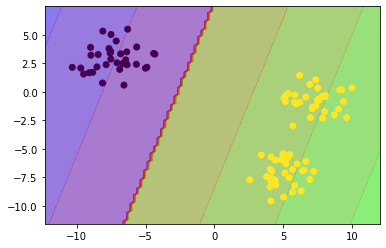

In [310]:
mesh_grid_vizual(X, y)